<a href="https://colab.research.google.com/github/ViniciusCastillo/Aprendendo/blob/master/BootcampAlura_Modulo3_Aula5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv("https://github.com/alura-cursos/Prophet_covid/raw/main/dados_covid_sp.zip", sep=";")
dados["datahora"] = pd.to_datetime(dados["datahora"])
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286178 entries, 0 to 286177
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   nome_munic     286178 non-null  object        
 1   codigo_ibge    286178 non-null  int64         
 2   dia            286178 non-null  int64         
 3   mes            286178 non-null  int64         
 4   datahora       286178 non-null  datetime64[ns]
 5   casos          286178 non-null  int64         
 6   casos_novos    286178 non-null  int64         
 7   casos_pc       286178 non-null  object        
 8   casos_mm7d     286178 non-null  object        
 9   obitos         286178 non-null  int64         
 10  obitos_novos   286178 non-null  int64         
 11  obitos_pc      286178 non-null  object        
 12  obitos_mm7d    286178 non-null  object        
 13  letalidade     286178 non-null  object        
 14  nome_ra        285735 non-null  object        
 15  

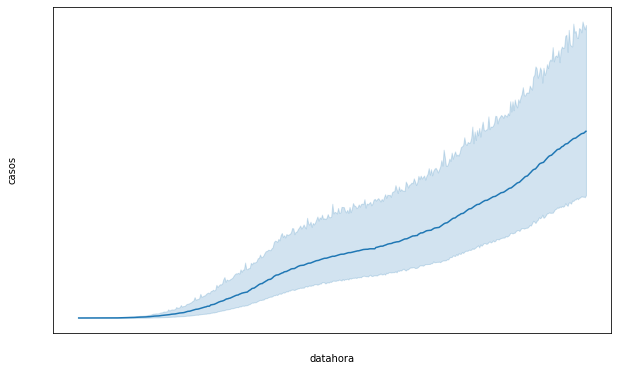

In [3]:
mpl.rcParams["figure.figsize"] =(10,6)
mpl.pyplot.rcParams['ytick.color'] = 'white'
mpl.pyplot.rcParams['xtick.color'] = 'white'
sns.lineplot(x="datahora", y="casos", data=dados)

In [4]:
dados_sp = dados.loc[dados["nome_munic"] == "São Paulo"].copy()
dados_sp.head()

nome_munic  codigo_ibge  dia  ...  latitude longitude  semana_epidem
562   São Paulo      3550308   25  ...  -23,5329  -46,6395              9
1207  São Paulo      3550308   26  ...  -23,5329  -46,6395              9
1852  São Paulo      3550308   27  ...  -23,5329  -46,6395              9
2497  São Paulo      3550308   28  ...  -23,5329  -46,6395              9
3142  São Paulo      3550308   29  ...  -23,5329  -46,6395              9

[5 rows x 26 columns]

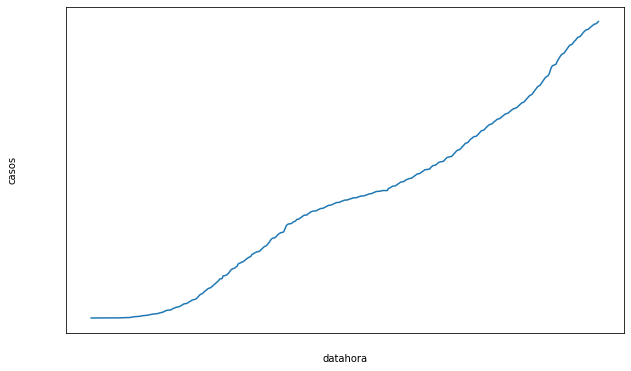

In [5]:
sns.lineplot(x="datahora", y="casos", data=dados_sp)

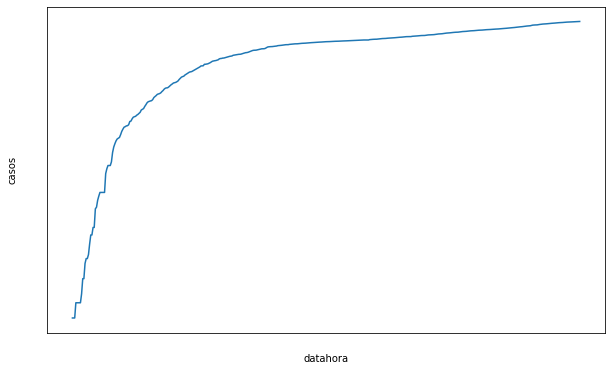

In [6]:
sns.lineplot(x="datahora", y="casos", data=dados_sp)
mpl.pyplot.yscale("log")

In [7]:
dados_sp["taxa_crescimento_casos"] = dados_sp["casos_novos"].diff()
dados_sp["taxa_crescimento_obitos"] = dados_sp["obitos_novos"].diff()

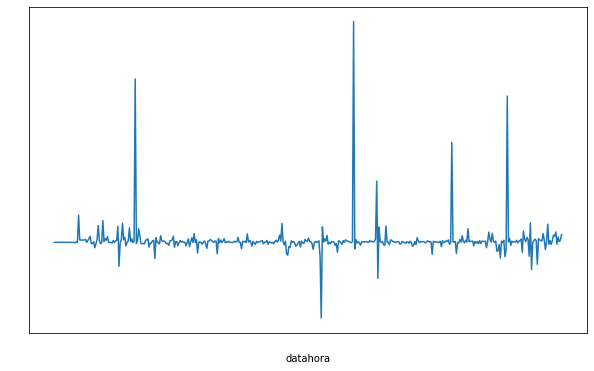

In [8]:
sns.lineplot(x="datahora",y=(dados_sp["taxa_crescimento_obitos"]/dados_sp["taxa_crescimento_casos"]), data=dados_sp)

In [9]:
dados_sp["ano"] = dados_sp["datahora"].dt.year
dados_sp["mes"] = dados_sp["datahora"].dt.month
dados_sp["dia"] = dados_sp["datahora"].dt.day

In [10]:
plotar = dados_sp.query("ano == 2021")

In [11]:
num_linhas = plotar["datahora"].count()
valores=[]
for i in np.arange(1,num_linhas, step=10):
  valores = valores + ["{}/{}".format(plotar["datahora"].dt.day.iloc[i], plotar["datahora"].dt.month.iloc[i])]


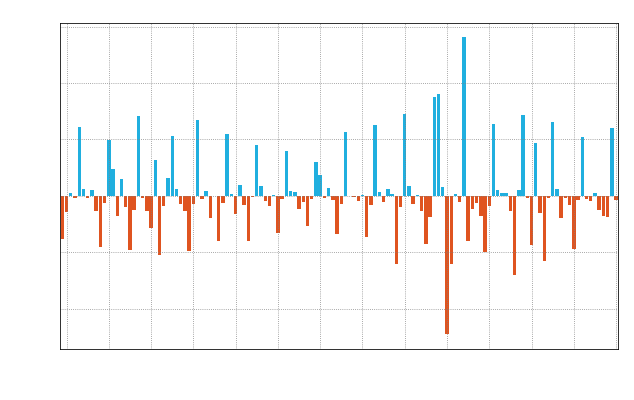

In [12]:
ax = sns.barplot(x="datahora", y ="taxa_crescimento_casos", data=plotar, 
                 palette=(plotar["taxa_crescimento_casos"]>0).map({True: "deepskyblue",
                                                                   False: "orangered"}))
# ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: "{:,.1f}".format(x/1)))
ylabels = ['{:,.3f}'.format(x) for x in ax.get_yticks()/1000]
ax.set_yticklabels(ylabels)
plt.xticks(np.arange(1,num_linhas, step=10), rotation=45, labels=valores)
plt.xlabel("dia/mês", fontweight="bold", color="white")
plt.ylabel("Crescimento de Casos", fontweight="bold", color="white")
plt.title("Taxa de crescimento da casos de COVID-19 na cidade de São Paulo", fontweight="bold", color="white")
plt.grid(linestyle=":", color="grey")

In [13]:
dados_sp["media_movel_casos"] = dados_sp["casos_novos"].rolling(window=7,center=False).mean()
dados_sp["media_movel_obitos"] = dados_sp["obitos_novos"].rolling(window=7,center=False).mean()

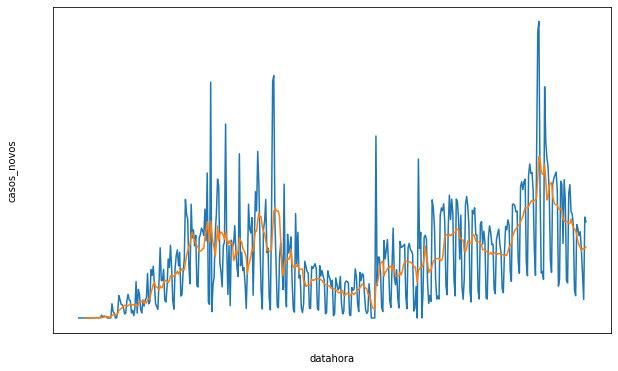

In [14]:
sns.lineplot(data=dados_sp, x="datahora", y="casos_novos")
sns.lineplot(data=dados_sp, x="datahora", y="media_movel_casos")

<BarContainer object of 443 artists>

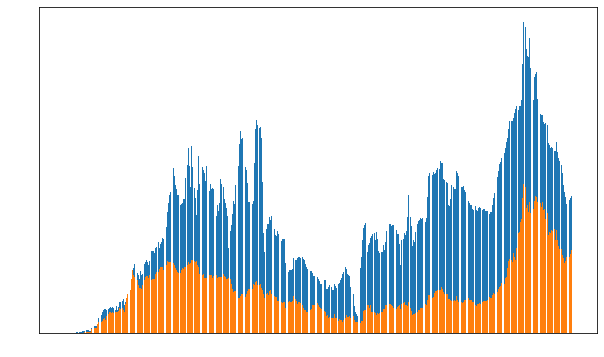

In [15]:
plt.bar(dados_sp["datahora"], dados_sp["media_movel_casos"])
plt.bar(dados_sp["datahora"], dados_sp["media_movel_obitos"]*10)

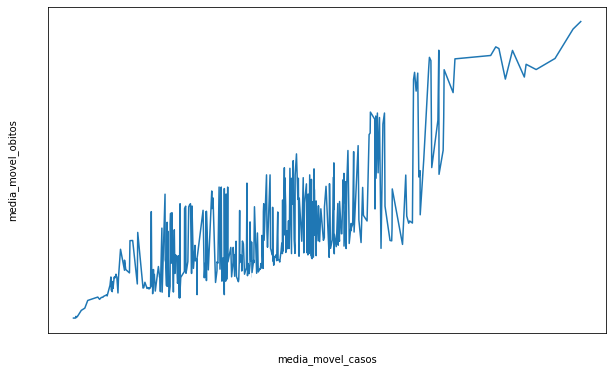

In [16]:
sns.lineplot(x="media_movel_casos",y="media_movel_obitos",data=dados_sp)

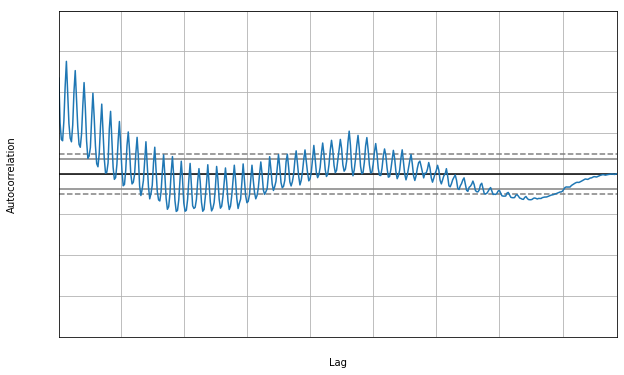

In [17]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(dados_sp['casos_novos'])

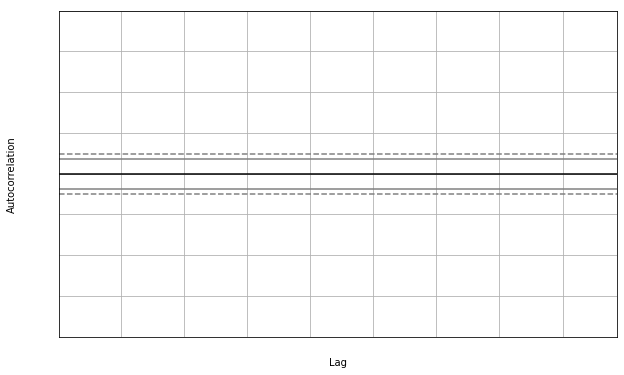

In [18]:
autocorrelation_plot(dados_sp['media_movel_casos'])

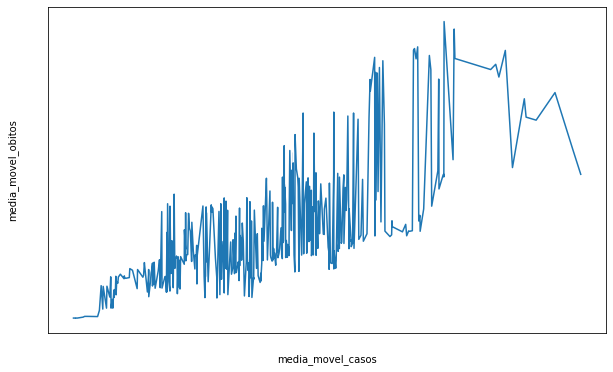

In [19]:
sns.lineplot(x="media_movel_casos",y=dados_sp["media_movel_obitos"].shift(7),data=dados_sp)

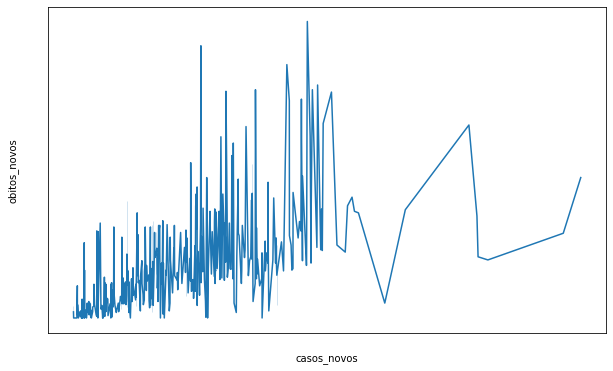

In [20]:
sns.lineplot(x="casos_novos",y=dados_sp["obitos_novos"].shift(14),data=dados_sp)

In [21]:
!pip install --upgrade statsmodels

In [22]:
import statsmodels.api as sm

In [23]:
correlCruzada = sm.tsa.stattools.ccf(dados_sp["casos_novos"], dados_sp["obitos_novos"], adjusted=False)


cores=[]
for x in correlCruzada:
  if x > 0:
    cores = cores + ["blue"]
  else:
    cores = cores + ["red"]

itens=np.arange(0,len(correlCruzada),1)
valores=[]
for i in np.arange(0,len(correlCruzada),40):
  valores = valores + [itens[i]]

valores


[0, 40, 80, 120, 160, 200, 240, 280, 320, 360, 400, 440]

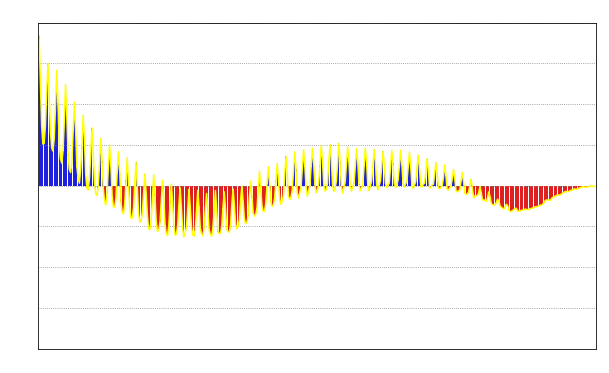

In [24]:
sns.lineplot(x=itens, y=correlCruzada, color="yellow")
sns.barplot(x=itens, y=correlCruzada, palette=cores)
plt.yticks(np.arange(-.8,1,0.2))
plt.xticks(ticks=np.arange(0,len(correlCruzada),40), labels=valores)
plt.title("Correlação cruzada entre novos casos e novos óbitos", fontweight="bold", color="white")
plt.grid(linestyle=":", color="grey", axis="y")

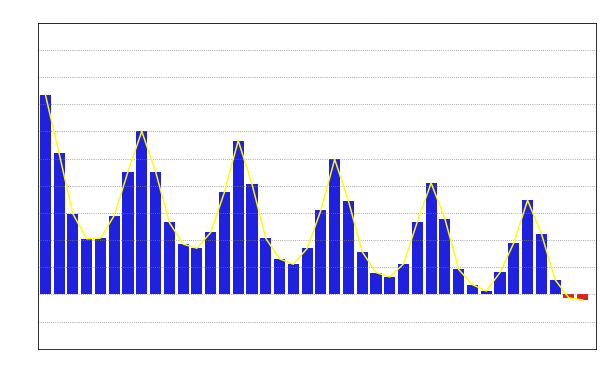

In [25]:
sns.lineplot(x=itens[0:40], y=correlCruzada[0:40], color="yellow")
sns.barplot(x=itens[0:40], y=correlCruzada[0:40], palette=cores)
plt.yticks(np.arange(-.2,1.1,0.1))
plt.xticks(ticks=np.arange(0,41,4), labels=np.arange(0,41,4))
plt.title("Correlação cruzada entre novos casos e novos óbitos", fontweight="bold", color="white")
plt.grid(linestyle=":", color="grey", axis="y")

In [26]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [27]:
df = pd.DataFrame()
df['ds'] = dados_sp['datahora']
df['y'] = dados_sp['casos_novos']
df.head()

ds  y
562  2020-02-25  0
1207 2020-02-26  0
1852 2020-02-27  0
2497 2020-02-28  1
3142 2020-02-29  0

In [28]:
modelo = Prophet()
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [29]:
dataframefuturo = modelo.make_future_dataframe(periods=30)
previsao = modelo.predict(dataframefuturo)
previsao.head()

ds       trend  ...  multiplicative_terms_upper        yhat
0 2020-02-25 -114.303728  ...                         0.0  386.013224
1 2020-02-26  -96.932780  ...                         0.0  457.834930
2 2020-02-27  -79.561833  ...                         0.0  571.148167
3 2020-02-28  -62.190885  ...                         0.0  306.251181
4 2020-02-29  -44.819937  ...                         0.0  -13.995200

[5 rows x 16 columns]

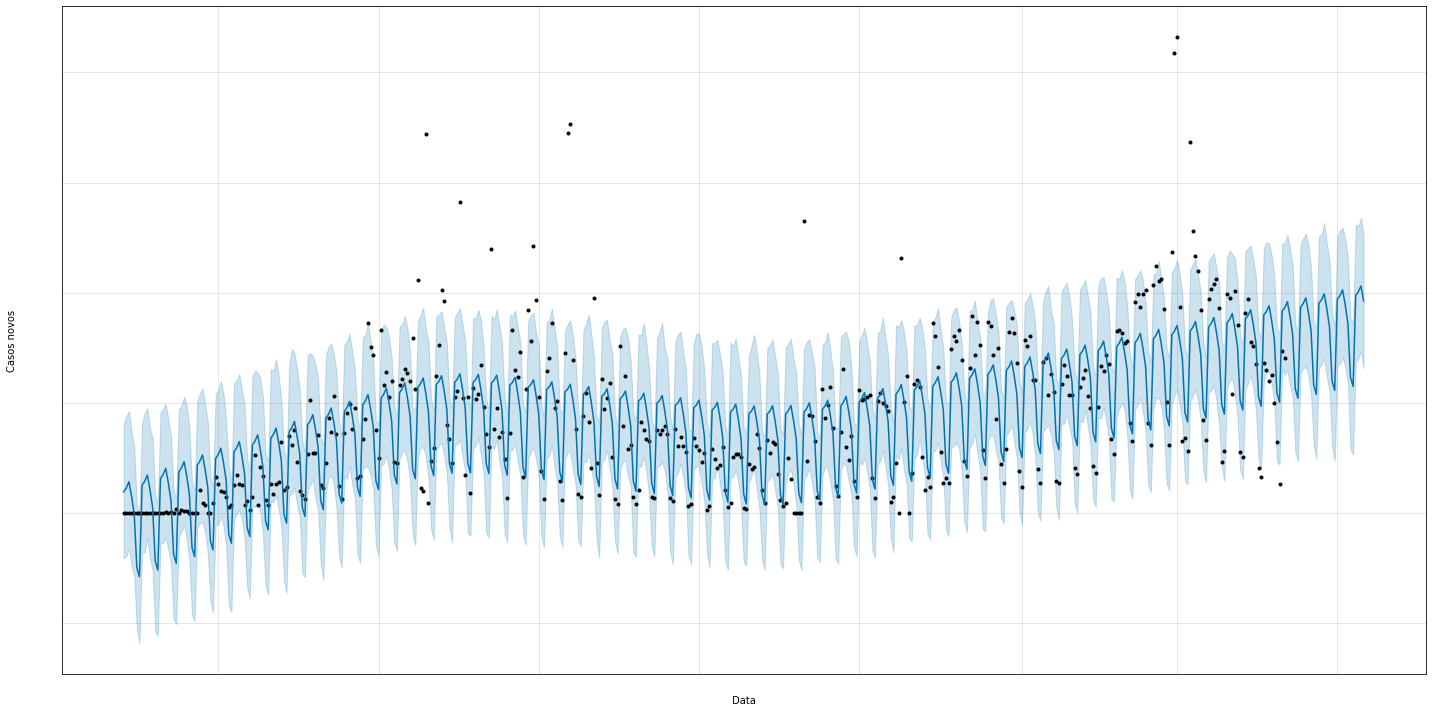

In [30]:
fig = modelo.plot(previsao, xlabel='Data', ylabel='Casos novos', figsize=(20,10))

In [31]:
dados_teste = pd.DataFrame()
dados_teste['ds'] = dados_sp.datahora[400:]
dados_teste['y'] = dados_sp.casos_novos[400:]
print(len(dados_teste))
dados_teste.head()

43


ds     y
258562 2021-03-31  8348
259207 2021-04-01  8646
259852 2021-04-02  3743
260497 2021-04-03  1311
261142 2021-04-04  1359

In [32]:
df = pd.DataFrame()
df['ds'] = dados_sp.datahora[:400]
df['y'] = dados_sp.casos_novos[:400]
df.head()

ds  y
562  2020-02-25  0
1207 2020-02-26  0
1852 2020-02-27  0
2497 2020-02-28  1
3142 2020-02-29  0

In [33]:
modelo = Prophet()
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=len(dados_teste))
previsao = modelo.predict(dataframefuturo)
previsao.head()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds       trend  ...  multiplicative_terms_upper        yhat
0 2020-02-25 -137.621348  ...                         0.0  320.078004
1 2020-02-26 -119.843618  ...                         0.0  337.016324
2 2020-02-27 -102.065887  ...                         0.0  494.014021
3 2020-02-28  -84.288157  ...                         0.0  256.493471
4 2020-02-29  -66.510426  ...                         0.0   -7.395631

[5 rows x 16 columns]

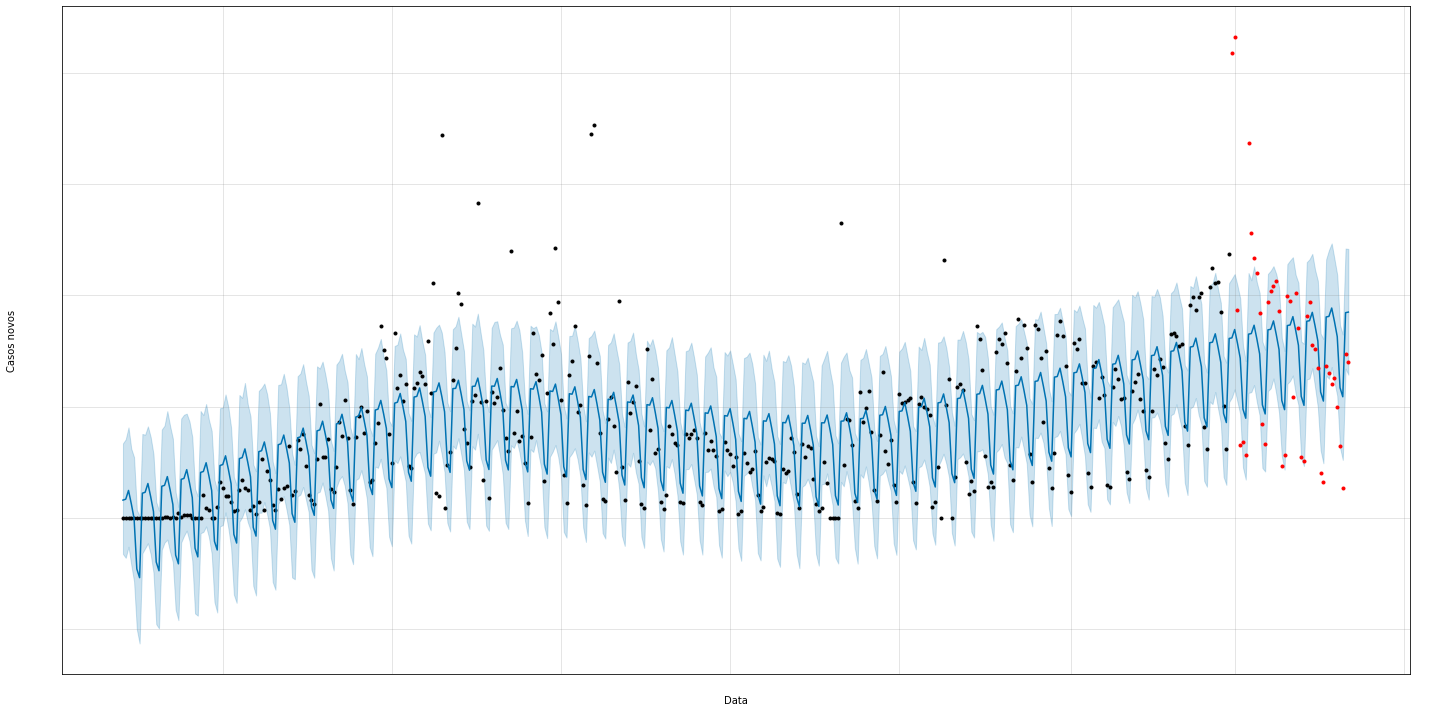

In [34]:
fig = modelo.plot(previsao, xlabel='Data', ylabel='Casos novos', figsize=(20,10))
plt.plot(dados_teste.ds, dados_teste.y, '.r')

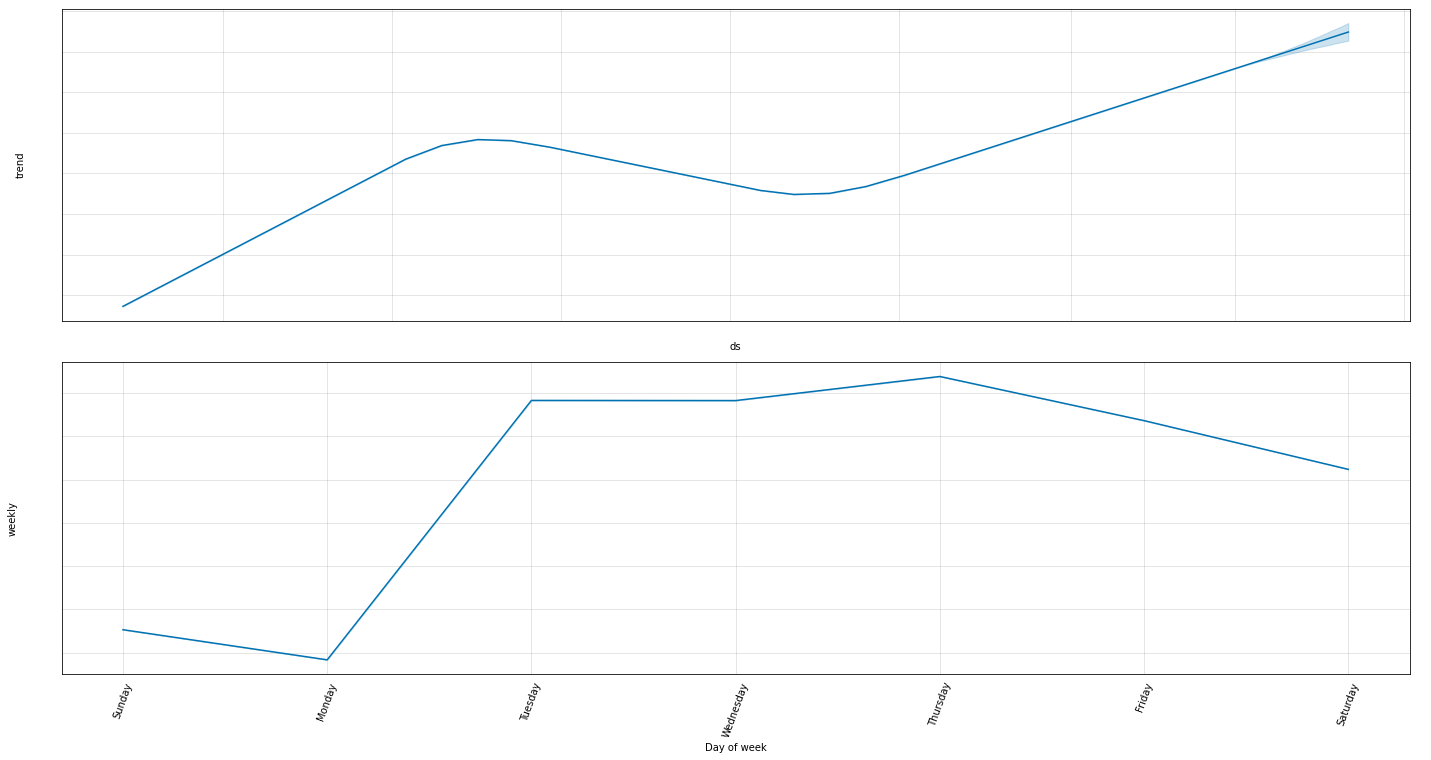

In [35]:
modelo.plot_components(previsao, figsize=(20,10))
plt.xticks(rotation='70', color='black'); #olhar rotação

In [36]:
from matplotlib.markers import MarkerStyle
from IPython.core.display import Markdown
def modelar (df, df_teste, y_label, show_change_points=True, growth='linear', changepoints=None, n_changepoints=25, changepoint_range=0.8, 
             yearly_seasonality='auto', weekly_seasonality='auto', daily_seasonality='auto', holidays=None, seasonality_mode='additive', 
             seasonality_prior_scale=10.0, holidays_prior_scale=10.0, changepoint_prior_scale=0.05, mcmc_samples=0, interval_width=0.8, 
             uncertainty_samples=1000, stan_backend=None):
  modelo = Prophet(growth, changepoints, n_changepoints, changepoint_range, yearly_seasonality, weekly_seasonality, daily_seasonality, 
                   holidays, seasonality_mode, seasonality_prior_scale, holidays_prior_scale, changepoint_prior_scale, mcmc_samples, 
                   interval_width, uncertainty_samples, stan_backend)
  modelo.fit(df)
  df_futuro = modelo.make_future_dataframe(periods=len(df_teste))
  if growth=='logistic': df_futuro['cap'] = df['cap'].iloc[0];
  previsao = modelo.predict(df_futuro)
  fig = modelo.plot(previsao, xlabel='Data', ylabel='Casos novos', figsize=(15,8))
  if show_change_points: a = add_changepoints_to_plot(fig.gca(), modelo, previsao);
  plt.plot(df_teste.ds, df_teste.y, ':', marker='.', color='orange')
  plt.plot(df.ds, df.y, ':', color="grey")
  plt.xticks(color='black')
  plt.yticks(color='black')
  return modelo, previsao

In [37]:
def cria_DFs (dados, campo_y, inicio_teste, inicio_treino=0, campo_data='datahora'):
  df_teste = pd.DataFrame()
  df_teste['ds'] = dados[campo_data][inicio_teste:]
  df_teste['y'] = dados[campo_y][inicio_teste:]
  df_teste = df_teste.reset_index(drop=True)
  df = pd.DataFrame()
  df['ds'] = dados[campo_data][inicio_treino:inicio_teste]
  df['y'] = dados[campo_y][inicio_treino:inicio_teste]
  df = df.reset_index(drop=True)
  return df, df_teste

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


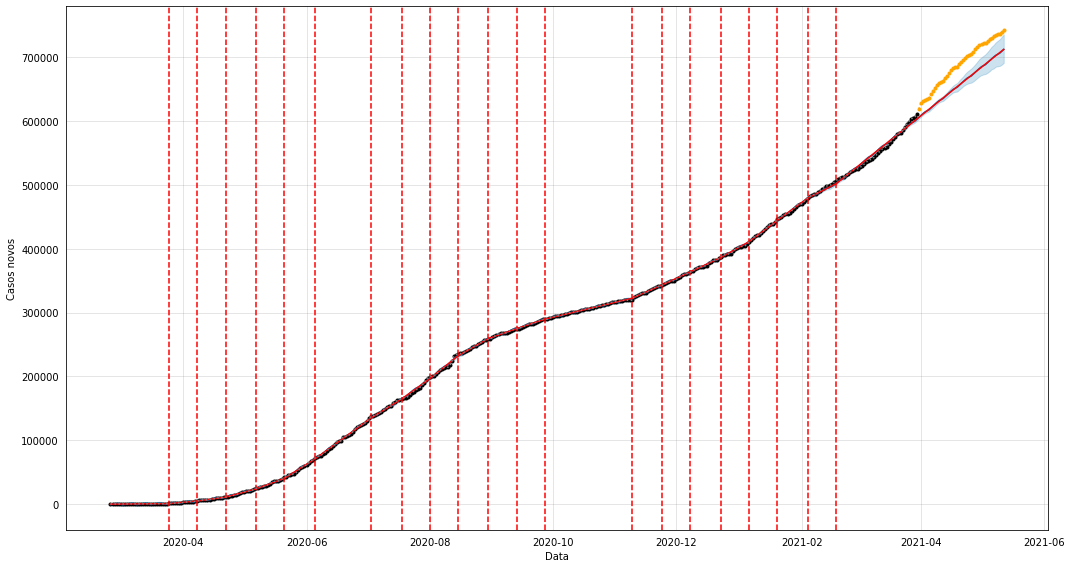

In [38]:
df, df_teste = cria_DFs(dados_sp, 'casos', 400)
df['cap'] = 40000000 * 0.02
m, previsao = modelar(df, df_teste, 'Casos Acumulados', 'logistic', changepoint_range=0.9)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


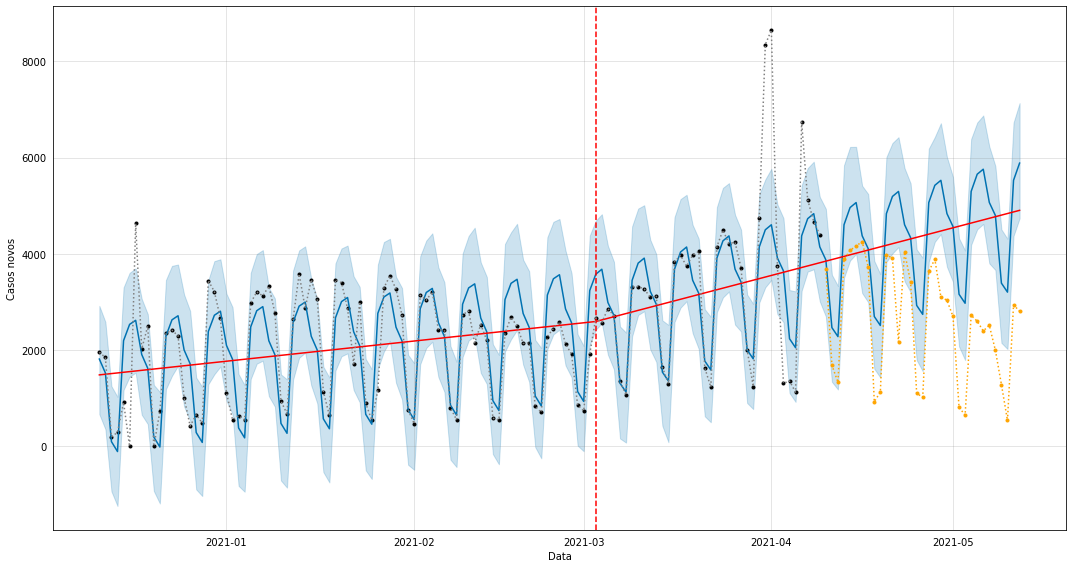

In [39]:
df, df_teste = cria_DFs(dados_sp, 'casos_novos', 410, 290)
m, previsao = modelar(df, df_teste, 'Casos', changepoints=['2021-03-03'], changepoint_range=0.9)

In [40]:
#Usando feriados especificos do municipio de SP

feriados_sp_2020 = [
'2020-02-25',
'2020-02-26',
'2020-04-10',
'2020-02-25',
'2020-02-26',
'2020-04-10',
'2020-04-21',
'2020-05-01',
'2020-05-20',
'2020-05-21', 
'2020-05-22',
'2020-05-25',
'2020-06-11',
'2020-09-07',
'2020-10-12',
'2020-11-02',
'2020-11-15',
'2020-12-25'
]

feriados_sp_2021 = [
'2021-01-01',
'2021-01-25',
'2021-02-15',
'2021-02-16',
'2021-02-17',
'2021-03-26',
'2021-03-29',
'2021-03-30',
'2021-03-31',
'2021-04-01',
'2021-04-02',
'2021-04-21',
'2021-05-01'
]


feriados_sp_2020 = pd.DataFrame({
  'holiday': 'sp_2020',
  'ds': pd.to_datetime(feriados_sp_2020)
})

feriados_sp_2021 = pd.DataFrame({
  'holiday': 'sp_2021',
  'ds': pd.to_datetime(feriados_sp_2021)
})

feriados = pd.concat((feriados_sp_2020, feriados_sp_2021))
feriados.head()

holiday         ds
0  sp_2020 2020-02-25
1  sp_2020 2020-02-26
2  sp_2020 2020-04-10
3  sp_2020 2020-02-25
4  sp_2020 2020-02-26

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


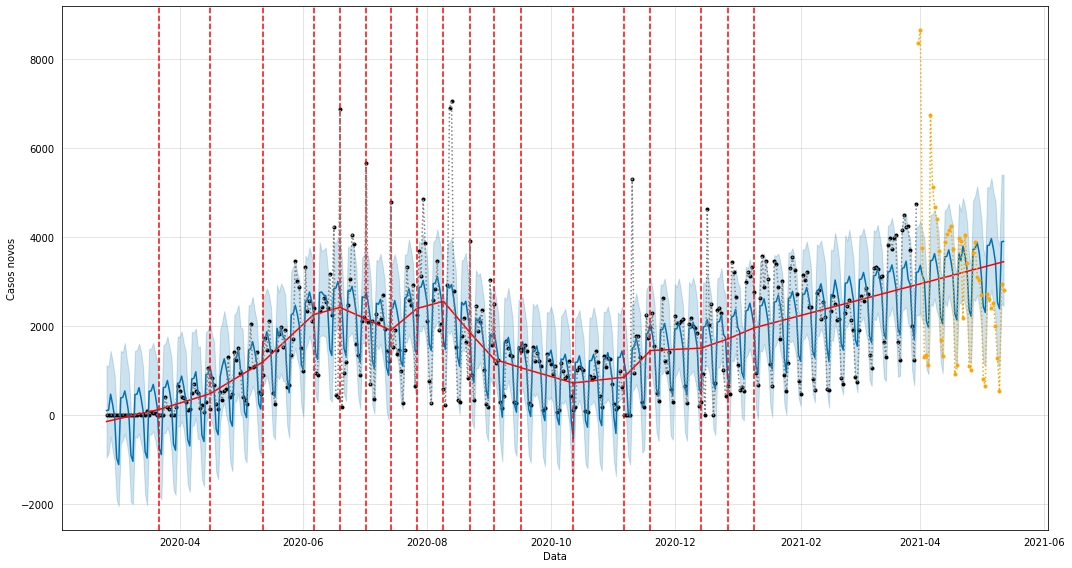

In [41]:
df, df_teste = cria_DFs(dados_sp, 'casos_novos', 400)
modelo_add, previsao_add = modelar(df, df_teste, 'Casos', changepoint_prior_scale=10.0, holidays=feriados)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


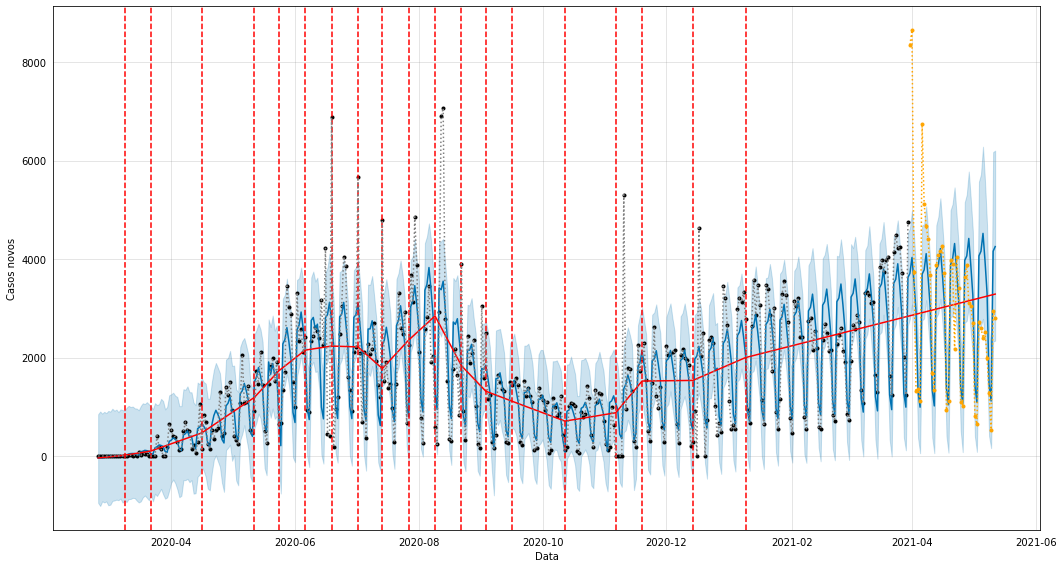

In [42]:
df, df_teste = cria_DFs(dados_sp, 'casos_novos', 400)
modelo_mult, previsao_mult = modelar(df, df_teste, 'Casos', changepoint_prior_scale=10.0, holidays=feriados, seasonality_mode='multiplicative')

In [43]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [83]:
def metricas (df_real, df_previsto, titulo):
  print ("\n"+ titulo)
  print ("Mean Absolute Error: %.2f" % mean_absolute_error(df_real['y'], df_previsto['yhat']))
  print ("Root Mean Squared Error: {:,.2f}".format(mean_squared_error(df_real['y'], df_previsto['yhat'])))
  print ("Mean Absolute Percentage Error: {:,.2f}".format(mean_absolute_percentage_error(df_real['y'], df_previsto['yhat'])))

In [84]:
#Sazonalidade aditiva
metricas(df, previsao_add[:400], 'Sazonalidade por Adição')
#Sazonalidade multiplicativa
metricas(df, previsao_mult[:400], 'Sazonalidade por Multiplicação')


Sazonalidade por Adição
Mean Absolute Error: 536.61
Root Mean Squared Error: 609,349.65
Mean Absolute Percentage Error: 158,250,359,581,772,256.00

Sazonalidade por Multiplicação
Mean Absolute Error: 452.36
Root Mean Squared Error: 523,056.04
Mean Absolute Percentage Error: 72,921,773,256,294,272.00


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


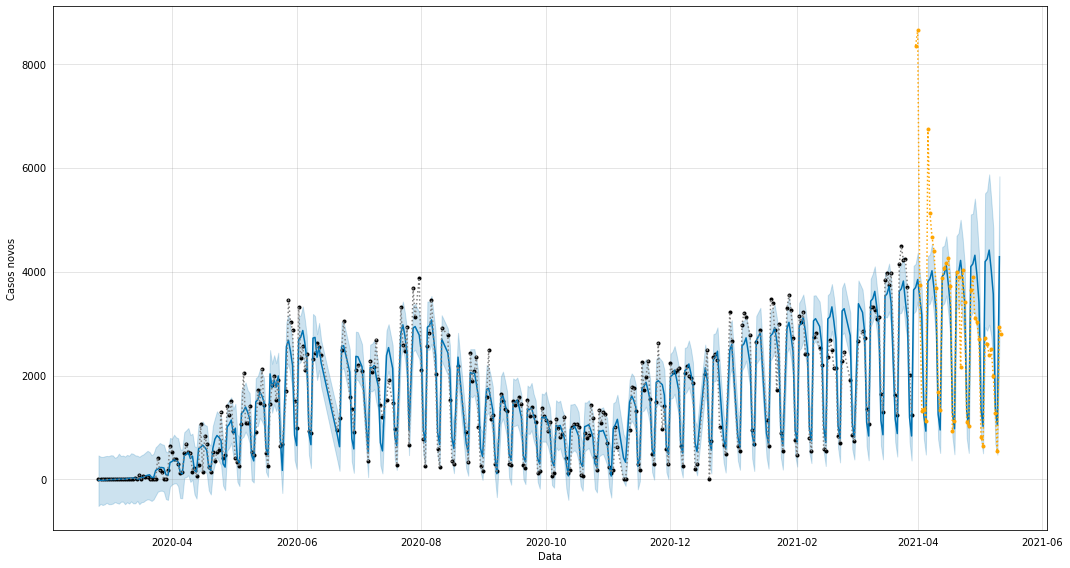

In [46]:
sem_outliers = df[(df['y']> previsao_mult['yhat_lower'][:400]) & (df['y'] < previsao_mult['yhat_upper'][:400])]
m_MaxMin, previsao_MaxMin = modelar(sem_outliers, df_teste, 'Casos', show_change_points=False, changepoint_prior_scale=10.0, 
                   holidays=feriados, seasonality_mode='multiplicative')

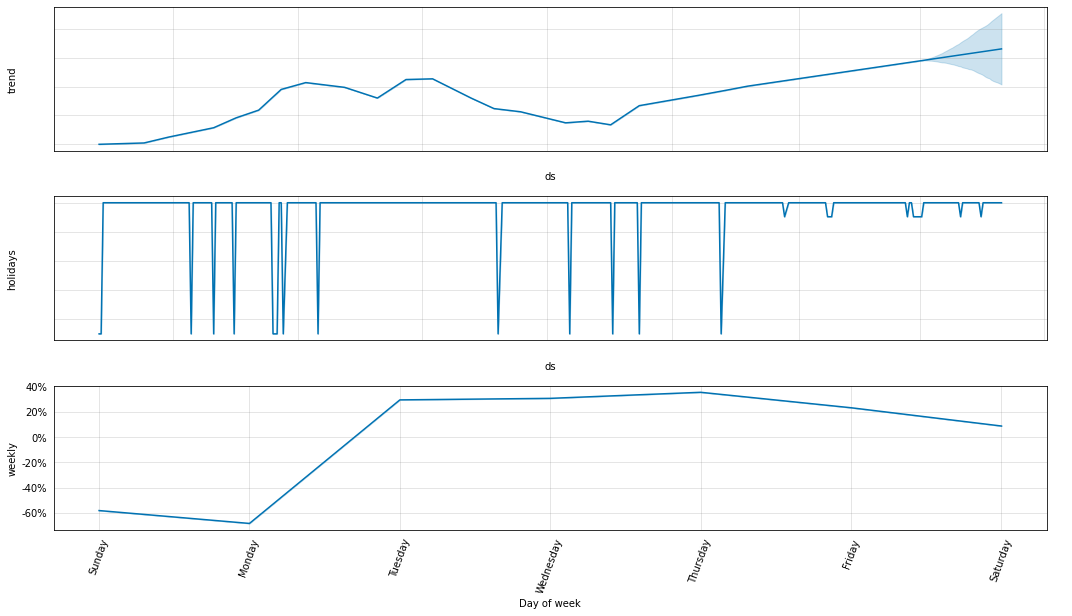

In [47]:
m_MaxMin.plot_components(previsao_MaxMin, figsize=(15,8))
plt.xticks(rotation='70', color='black');
plt.yticks(color='black');

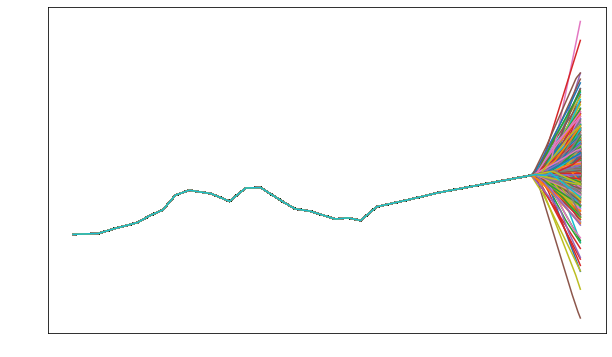

In [48]:
amostras = m_MaxMin.predictive_samples(previsao_MaxMin)
plt.plot(previsao_MaxMin['ds'],amostras['trend']);

In [49]:
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [50]:
df_cv = cross_validation(modelo_mult, initial='180 days', period='30 days', horizon = '30 days')

INFO:fbprophet:Making 7 forecasts with cutoffs between 2020-09-01 00:00:00 and 2021-02-28 00:00:00


  0%|          | 0/7 [00:00<?, ?it/s]

In [51]:
janela = 5 #mudar o valor da janela para verificar as janelas utilizadas para a validação dos resultados.
cutoff = df_cv['cutoff'].unique()[janela]
df_cv_cut = df_cv[df_cv['cutoff'].values == cutoff]

Text(0.5, 0, 'ds')

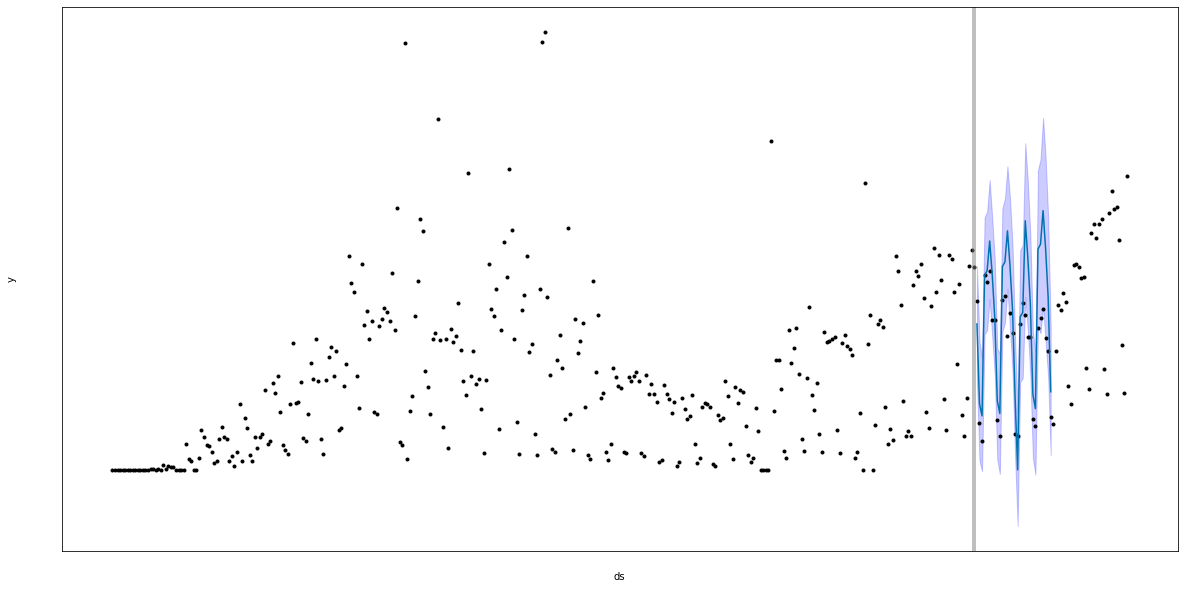

In [52]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(modelo.history['ds'].values, modelo.history['y'], 'k.')
ax.plot(df_cv_cut['ds'].values, df_cv_cut['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv_cut['ds'].values, df_cv_cut['yhat_lower'],
                df_cv_cut['yhat_upper'], color='blue',
                alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')

In [53]:
performance_metrics(df_cv)

INFO:fbprophet:Skipping MAPE because y close to 0


horizon           mse         rmse         mae     mdape  coverage
0   3 days  3.243901e+05   569.552541  424.545575  0.278740  0.904762
1   4 days  3.232932e+05   568.588803  415.171115  0.342543  0.904762
2   5 days  2.404861e+05   490.393856  375.255083  0.270098  0.952381
3   6 days  1.579958e+05   397.486824  315.518734  0.196749  1.000000
4   7 days  3.019837e+05   549.530478  446.440472  0.292429  0.952381
5   8 days  2.554355e+05   505.406249  372.957253  0.196749  0.952381
6   9 days  2.606663e+05   510.554913  398.451640  0.292429  0.952381
7  10 days  1.100579e+06  1049.084994  520.898375  0.268761  0.952381
8  11 days  1.104853e+06  1051.119735  515.654046  0.198549  0.952381
9  12 days  1.104300e+06  1050.856642  510.709694  0.194216  0.952381
10 13 days  3.297442e+05   574.233580  405.862041  0.198549  0.952381
11 14 days  4.291110e+05   655.065664  537.741241  0.301254  0.952381
12 15 days  4.497672e+05   670.646873  535.985277  0.342440  0.952381
13 16 days  5.144805e+05   717.272932  556.581918  0.301254  0.952381
14 17 days  8.430511e+05   918.178152  694.326914  0.342440  0.857143
15 18 days  8.076866e+05   898.713862  659.397363  0.290497  0.857143
16 19 days  6.763155e+05   822.384063  608.380580  0.322300  0.857143
17 20 days  6.538804e+05   808.628724  614.995935  0.366203  0.809524
18 21 days  7.559662e+05   869.463173  698.190700  0.387503  0.761905
19 22 days  6.683074e+05   817.500703  643.064987  0.361254  0.809524
20 23 days  4.295051e+05   655.366394  519.143832  0.279908  0.904762
21 24 days  4.437423e+05   666.139839  514.517452  0.292806  0.904762
22 25 days  6.877732e+05   829.320937  634.379673  0.292806  0.809524
23 26 days  8.602303e+05   927.486002  735.261781  0.435782  0.809524
24 27 days  1.099370e+06  1048.508352  843.773407  0.508327  0.714286
25 28 days  1.000847e+06  1000.423639  821.490598  0.510016  0.809524
26 29 days  8.311682e+05   911.684282  744.963641  0.510016  0.857143
27 30 days  7.086623e+05   841.820829  654.702783  0.454739  0.952381

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


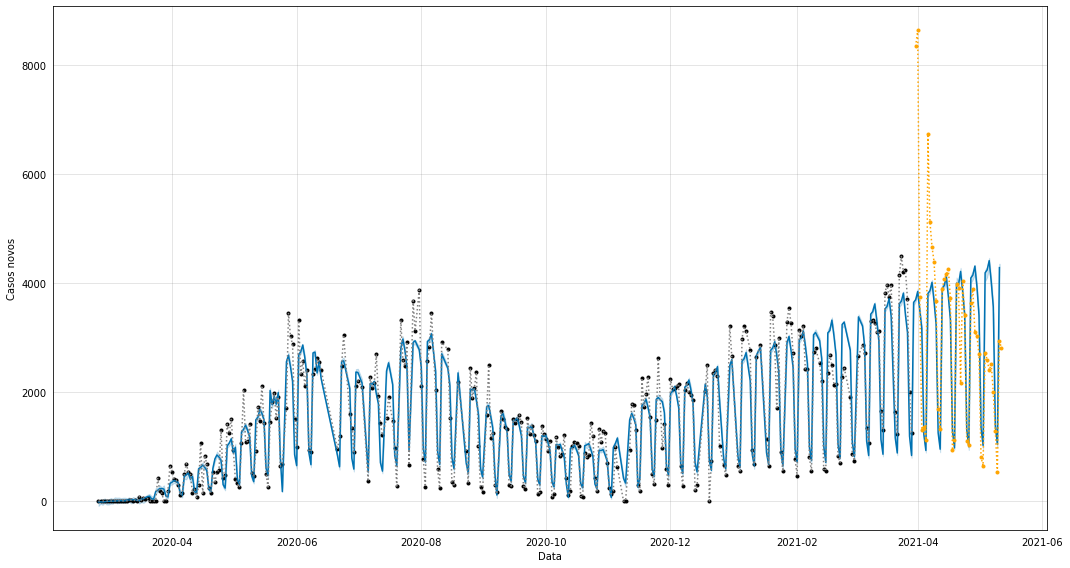

In [55]:
sem_outliers = df[(df['y']> previsao_mult['yhat_lower'][:400]) & (df['y'] < previsao_mult['yhat_upper'][:400])]
m_MaxMin, previsao_MaxMin = modelar(sem_outliers, df_teste, 'Casos', show_change_points=False, changepoint_prior_scale=10.0, 
                   holidays=feriados, seasonality_mode='multiplicative', interval_width=0.1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


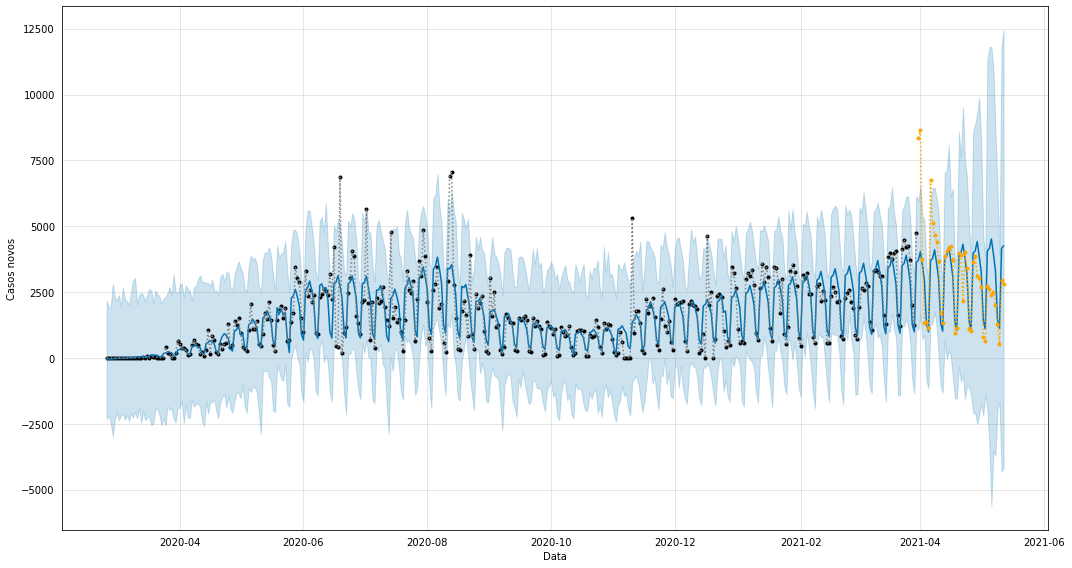

In [56]:
df, df_teste = cria_DFs(dados_sp, 'casos_novos', 400)
modelo_mult_1, previsao_mult_1 = modelar(df, df_teste, 'Casos', show_change_points=False, changepoint_prior_scale=10.0, holidays=feriados, 
                                     seasonality_mode='multiplicative', interval_width=1)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


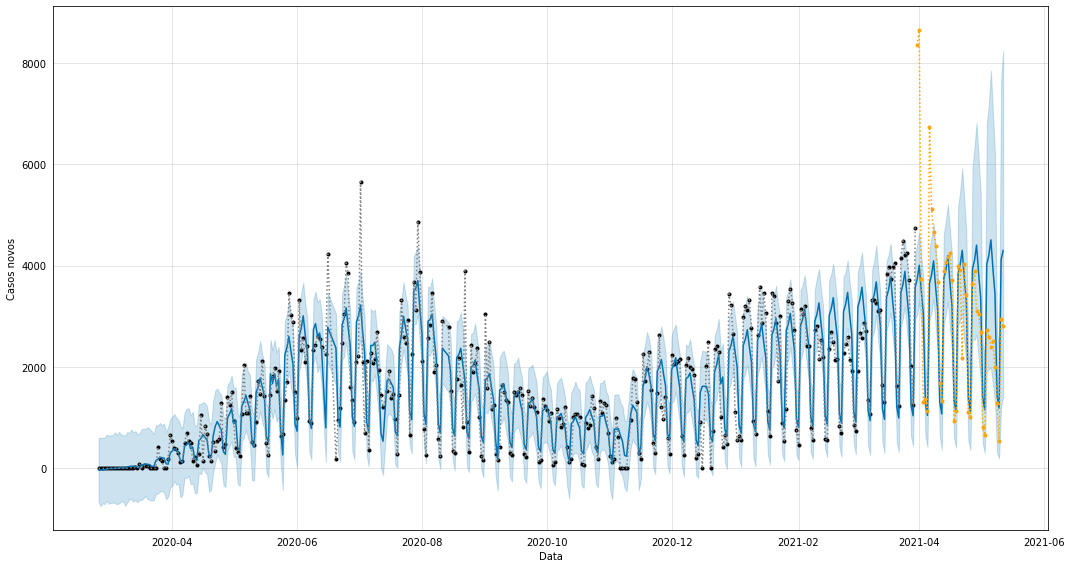

In [57]:
sem_outliers = df[(df['y']> previsao_mult_1['yhat_lower'][:400]) & (df['y'] < previsao_mult_1['yhat_upper'][:400])]
m_interval_1, previsao_interval_1 = modelar(sem_outliers, df_teste, 'Casos', show_change_points=False, changepoint_prior_scale=10.0, 
                   holidays=feriados, seasonality_mode='multiplicative')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


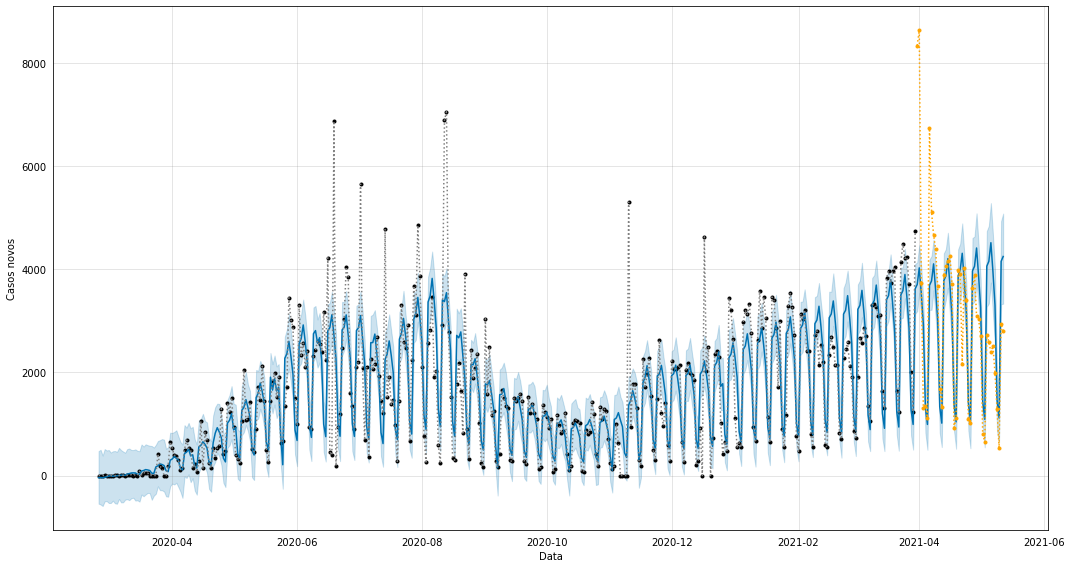

In [58]:
df, df_teste = cria_DFs(dados_sp, 'casos_novos', 400)
modelo_mult_05, previsao_mult_05 = modelar(df, df_teste, 'Casos', show_change_points=False, changepoint_prior_scale=10.0, holidays=feriados, 
                                     seasonality_mode='multiplicative', interval_width=0.5)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


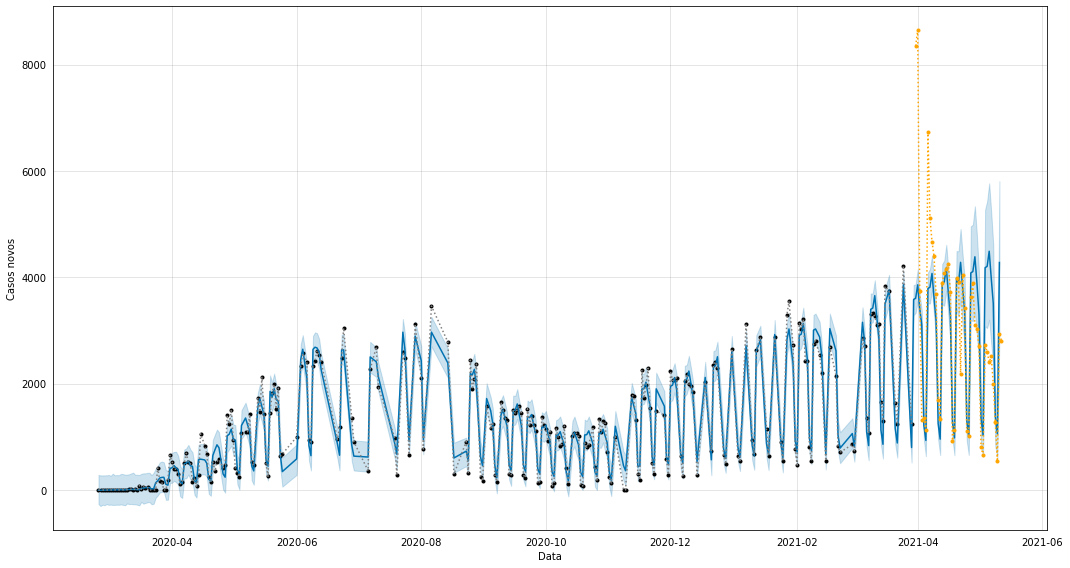

In [59]:
sem_outliers = df[(df['y']> previsao_mult_05['yhat_lower'][:400]) & (df['y'] < previsao_mult_05['yhat_upper'][:400])]
m_interval_05, previsao_interval_05 = modelar(sem_outliers, df_teste, 'Casos', show_change_points=False, changepoint_prior_scale=10.0, 
                   holidays=feriados, seasonality_mode='multiplicative')

In [60]:
df_cv_interval_1 = cross_validation(m_interval_1, initial='180 days', period='30 days', horizon = '30 days')

INFO:fbprophet:Making 7 forecasts with cutoffs between 2020-09-01 00:00:00 and 2021-02-28 00:00:00


  0%|          | 0/7 [00:00<?, ?it/s]

In [61]:
df_cv_interval_05 = cross_validation(m_interval_05, initial='180 days', period='30 days', horizon = '30 days')

INFO:fbprophet:Making 7 forecasts with cutoffs between 2020-08-31 00:00:00 and 2021-02-27 00:00:00


  0%|          | 0/7 [00:00<?, ?it/s]

In [62]:
df_cv_interval_08 = cross_validation(m_MaxMin, initial='180 days', period='30 days', horizon = '30 days')

INFO:fbprophet:Making 7 forecasts with cutoffs between 2020-08-31 00:00:00 and 2021-02-27 00:00:00


  0%|          | 0/7 [00:00<?, ?it/s]

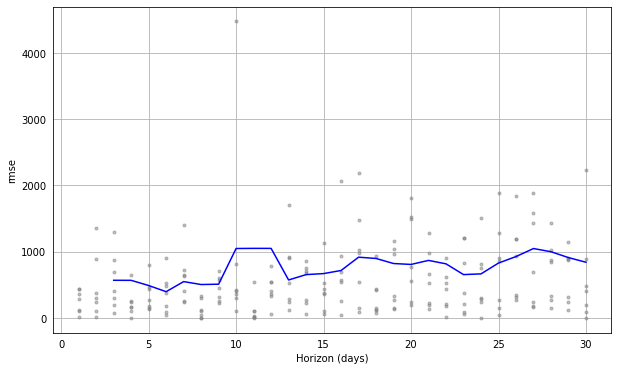

In [63]:
fig = plot_cross_validation_metric(df_cv ,metric='rmse')
plt.xticks(color="black");
plt.yticks(color="black");

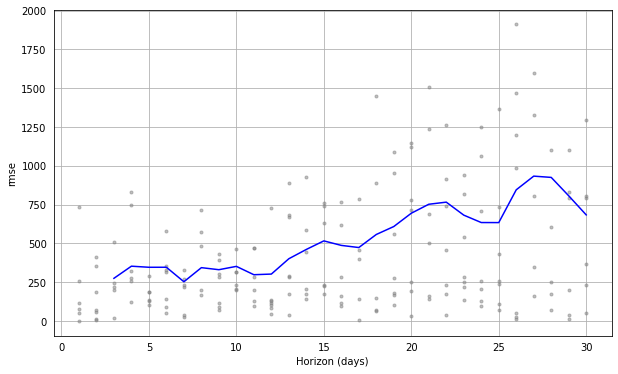

In [64]:
fig = plot_cross_validation_metric(df_cv_interval_08,metric='rmse')
plt.xticks(color="black");
plt.yticks(color="black");

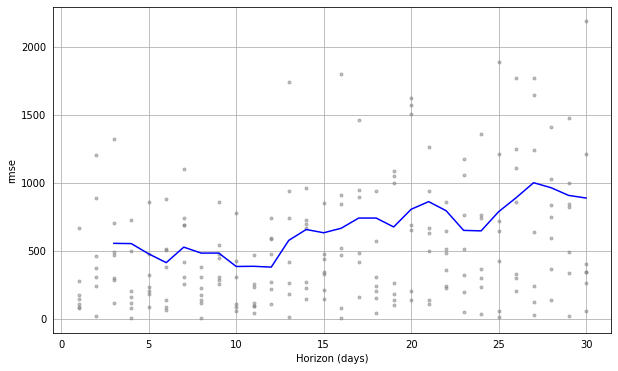

In [65]:
fig = plot_cross_validation_metric(df_cv_interval_1,metric='rmse')
plt.xticks(color="black");
plt.yticks(color="black");

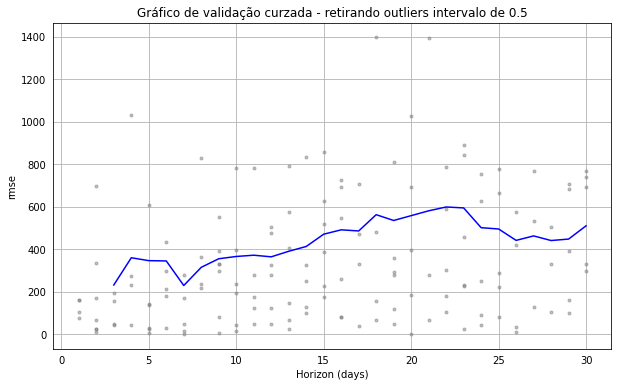

In [86]:
fig = plot_cross_validation_metric(df_cv_interval_05,metric='rmse')
plt.xticks(color="black");
plt.yticks(color="black");
plt.title("Gráfico de validação curzada - retirando outliers intervalo de 0.5", color="black");

In [85]:
print("COMPARANDO A BASE DE TESTE COM AS PREVISÕES")
metricas(df_teste, previsao_mult[-len(df_teste):], 'Modelo padrão sem retirar outiliers')
metricas(df_teste, previsao_MaxMin[-len(df_teste):], 'Retirando outiliers: intervalo de confinça padrão (0.8)')
metricas(df_teste, previsao_interval_1[-len(df_teste):], 'Retirando outiliers: intervalo de confiança de 1')
metricas(df_teste, previsao_interval_05[-len(df_teste):], 'Retirando outiliers: intervalo de confiança de 0.5')

COMPARANDO A BASE DE TESTE COM AS PREVISÕES

Modelo padrão sem retirar outiliers
Mean Absolute Error: 909.93
Root Mean Squared Error: 1,953,049.31
Mean Absolute Percentage Error: 0.34

Retirando outiliers: intervalo de confinça padrão (0.8)
Mean Absolute Error: 1470.93
Root Mean Squared Error: 4,014,532.15
Mean Absolute Percentage Error: 0.67

Retirando outiliers: intervalo de confiança de 1
Mean Absolute Error: 911.63
Root Mean Squared Error: 1,968,958.92
Mean Absolute Percentage Error: 0.34

Retirando outiliers: intervalo de confiança de 0.5
Mean Absolute Error: 1460.00
Root Mean Squared Error: 3,987,811.69
Mean Absolute Percentage Error: 0.66
